In [2]:
# Set up reload situation
%load_ext autoreload
%autoreload 2

from pathlib import Path

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import random
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import colorsys

import utils

In [31]:
help(Image)

Help on module PIL.Image in PIL:

NAME
    PIL.Image

DESCRIPTION
    # The Python Imaging Library.
    # $Id$
    #
    # the Image class wrapper
    #
    # partial release history:
    # 1995-09-09 fl   Created
    # 1996-03-11 fl   PIL release 0.0 (proof of concept)
    # 1996-04-30 fl   PIL release 0.1b1
    # 1999-07-28 fl   PIL release 1.0 final
    # 2000-06-07 fl   PIL release 1.1
    # 2000-10-20 fl   PIL release 1.1.1
    # 2001-05-07 fl   PIL release 1.1.2
    # 2002-03-15 fl   PIL release 1.1.3
    # 2003-05-10 fl   PIL release 1.1.4
    # 2005-03-28 fl   PIL release 1.1.5
    # 2006-12-02 fl   PIL release 1.1.6
    # 2009-11-15 fl   PIL release 1.1.7
    #
    # Copyright (c) 1997-2009 by Secret Labs AB.  All rights reserved.
    # Copyright (c) 1995-2009 by Fredrik Lundh.
    #
    # See the README file for information on usage and redistribution.
    #

CLASSES
    builtins.Exception(builtins.BaseException)
        DecompressionBombError
    builtins.RuntimeWarning(buil

In [3]:
def image_to_binary(image):
    """
    Convert a (..., width x height x 3) int8 image array to a (..., width x height x 24) binary array.
    """
    # Ensure the input is the correct shape and type
    assert image.shape[-1] == 3 and image.dtype == np.uint8, "Input must be (..., width, height, 3) with dtype int8"
    assert image.ndim >= 3, "Image must have at least 3 dimensions"

    # Create a 24-bit integer representation
    int32 = image.astype(np.uint32)
    int32 = (int32[..., 0] << 16) | (int32[..., 1] << 8) | int32[..., 2]

    # Convert to binary
    binary = np.unpackbits(int32.view(np.uint8), axis=-1, bitorder="big")

    # Reshape to (width, height, 24)
    new_shape = [*image.shape[:-1], 32]
    binary = binary.reshape(*new_shape)
    binary = binary[..., :24][..., ::-1]  # Remove the extra bits and reverse the order
    return binary


def binary_to_image(binary, clip_bits=0):
    """
    Convert a (..., width x height x 24) binary array back to a (..., width x height x 3) int8 image array.
    """
    # Ensure the input is the correct shape and type
    assert binary.shape[-1] == 24 and np.array_equal(binary, binary.astype(bool)), "Input must be (width, height, 24) with 1/0"

    # Reshape and pack bits
    int24 = np.packbits(binary[..., ::-1], axis=-1, bitorder="big")
    pad = np.zeros_like(int24[..., [0]])
    int24 = np.concatenate([int24, pad], axis=-1)
    int32 = int24.view(np.uint32)

    # Extract RGB channels
    r = (int32 >> 16) & 255
    g = (int32 >> 8) & 255
    b = int32 & 255

    # Combine channels and convert to int8
    return np.stack([r, g, b], axis=-1).astype(np.uint8).squeeze(-2)

In [1]:
image = np.random.randint(0, 255, (10, 10, 3), dtype=np.uint8)
x = image_to_binary(image)



# plt.imshow(image)
# plt.show()

NameError: name 'np' is not defined

In [ ]:
from PIL import Image, ImageDraw
import math

def create_frame(t, size=(200, 200), ball_radius=20):
    frame = Image.new('RGB', size, color='white')
    draw = ImageDraw.Draw(frame)
    
    # Calculate ball position
    x = size[0] // 2
    y = int(size[1] // 2 + size[1] // 3 * math.sin(t * 0.5))
    
    # Draw the ball
    draw.ellipse([x - ball_radius, y - ball_radius, 
                  x + ball_radius, y + ball_radius], 
                 fill='red', outline='black')
    
    return frame

def create_gif(filename, duration=100, frames=30):
    images = []
    for t in range(frames):
        images.append(create_frame(t))
    
    # Save the frames as an animated GIF
    images[0].save(filename, save_all=True, append_images=images[1:], 
                   optimize=False, duration=duration, loop=0)

# Create and save the GIF
create_gif('bouncing_ball.gif')
print("GIF created successfully!")

(11, 33543)


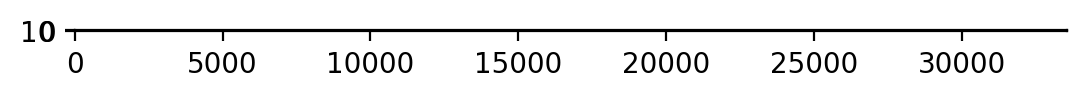

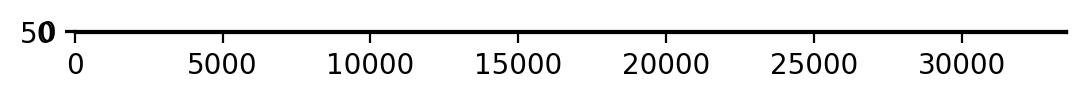

False

In [27]:
import numpy as np
from matplotlib import pyplot as plt

def hebbian_weights(patterns):
    K, N = patterns.shape
    W = (patterns.T @ patterns) / K
    W = W * (1 - np.eye(N))
    return W

def sign(x):
    """unlike numpy sign function, returns 1 for values of 0 (convention in Hopfield activity)"""
    return np.sign(x) + (x == 0)

def update(x0, W, steps=10):
    out = []
    out.append(x0)
    x = np.copy(x0)
    for _ in range(steps):
        x = sign(W @ x)
        out.append(x)
    return np.array(out)

N = 33543
P = 63

patterns = (np.random.rand(P, N) > 0.95) * 2.0 - 1.0
W = hebbian_weights(patterns)

out = update(patterns[0], W, steps=10)
print(out.shape)

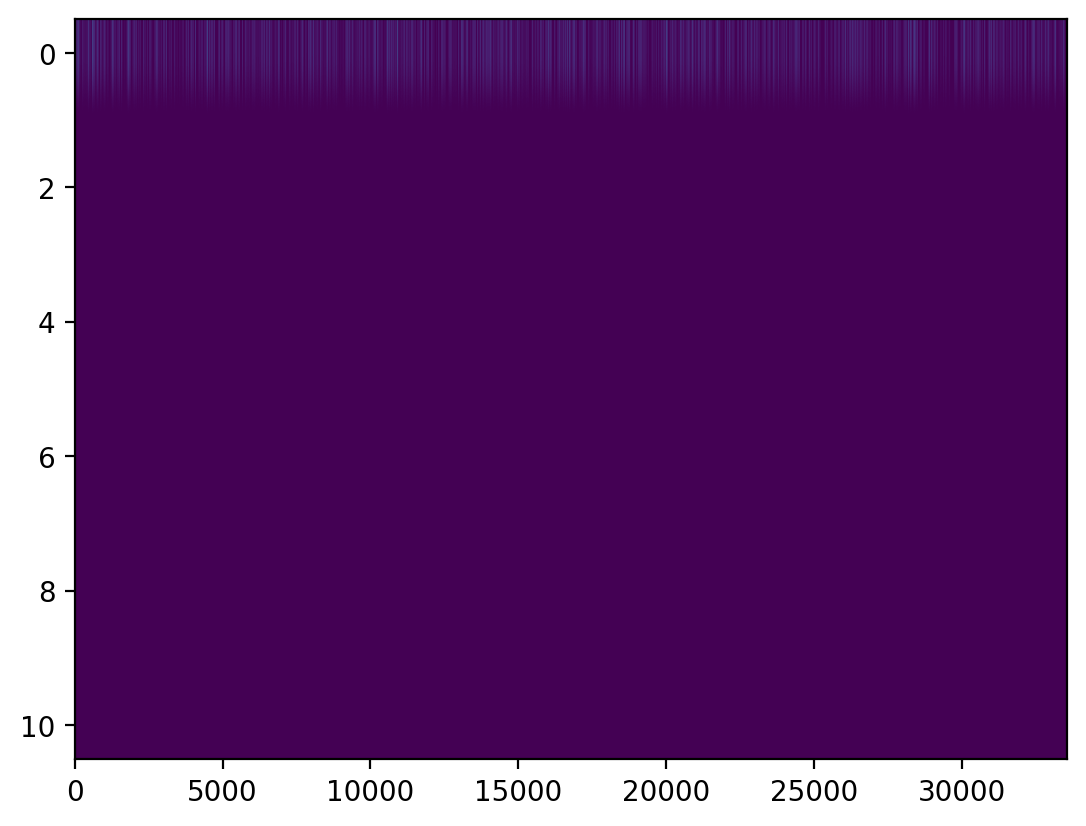

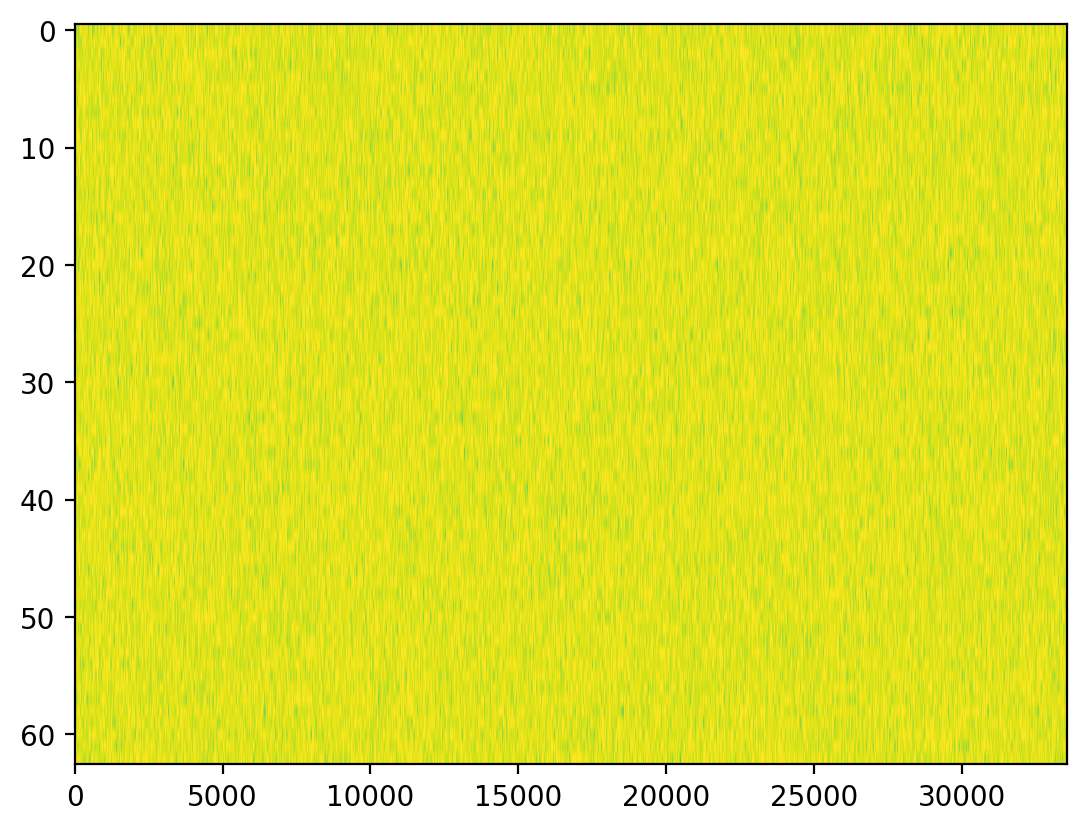

In [28]:

plt.close('all')
plt.imshow(out, aspect="auto")
plt.show()

plt.close('all')
plt.imshow(out[-1] - patterns, aspect="auto")
plt.show()

